In [192]:
# import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from datetime import date
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [193]:
Walmart_sales_df = pd.read_csv('Walmart_Store_sales.csv')

### 1. Data exploration and Analysis 

In [194]:
Walmart_sales_df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [195]:
Walmart_sales_df.shape

(6435, 8)

In [196]:
# zero null value
Walmart_sales_df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [197]:
Walmart_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [198]:
Walmart_sales_df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [199]:
Walmart_sales_df["Date"] = pd.to_datetime(Walmart_sales_df["Date"]) 

In [200]:
Walmart_sales_df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [201]:
# store 14 has maximum sales
Walmart_sales_df.iloc[Walmart_sales_df['Weekly_Sales'].argmax()]

Store                            14
Date            2010-12-24 00:00:00
Weekly_Sales             3818686.45
Holiday_Flag                      0
Temperature                   30.59
Fuel_Price                    3.141
CPI                       182.54459
Unemployment                  8.724
Name: 1905, dtype: object

In [202]:
# find the maximum standard deviation and the coefficient of mean to standard deviation
maximum_std = pd.DataFrame(Walmart_sales_df.groupby('Store').agg({'Weekly_Sales':['std','mean']})) 
maximum_std=maximum_std.reset_index()
maximum_std['coefficient'] = maximum_std[('Weekly_Sales','std')]/maximum_std[('Weekly_Sales','mean')]*100
maximum_std

Store   Weekly_Sales               coefficient
                    std          mean            
0      1  155980.767761  1.555264e+06   10.029212
1      2  237683.694682  1.925751e+06   12.342388
2      3   46319.631557  4.027044e+05   11.502141
3      4  266201.442297  2.094713e+06   12.708254
4      5   37737.965745  3.180118e+05   11.866844
5      6  212525.855862  1.564728e+06   13.582286
6      7  112585.469220  5.706173e+05   19.730469
7      8  106280.829881  9.087495e+05   11.695283
8      9   69028.666585  5.439806e+05   12.689547
9     10  302262.062504  1.899425e+06   15.913349
10    11  165833.887863  1.356383e+06   12.226183
11    12  139166.871880  1.009002e+06   13.792532
12    13  265506.995776  2.003620e+06   13.251363
13    14  317569.949476  2.020978e+06   15.713674
14    15  120538.652043  6.233125e+05   19.338399
15    16   85769.680133  5.192477e+05   16.518065
16    17  112162.936087  8.935814e+05   12.552067
17    18  176641.510839  1.084718e+06   16.284550
18    19  191722.638730  1.444999e+06   13.268012
19    20  275900.562742  2.107677e+06   13.090269
20    21  128752.812853  7.560691e+05   17.029239
21    22  161251.350631  1.028501e+06   15.678288
22    23  249788.038068  1.389864e+06   17.972115
23    24  167745.677567  1.356755e+06   12.363738
24    25  112976.788600  7.067215e+05   15.986040
25    26  110431.288141  1.002912e+06   11.011066
26    27  239930.135688  1.775216e+06   13.515544
27    28  181758.967539  1.323522e+06   13.732974
28    29   99120.136596  5.394514e+05   18.374247
29    30   22809.665590  4.385796e+05    5.200804
30    31  125855.942933  1.395901e+06    9.016105
31    32  138017.252087  1.166568e+06   11.831049
32    33   24132.927322  2.598617e+05    9.286835
33    34  104630.164676  9.667816e+05   10.822524
34    35  211243.457791  9.197250e+05   22.968111
35    36   60725.173579  3.735120e+05   16.257891
36    37   21837.461190  5.189003e+05    4.208412
37    38   42768.169450  3.857317e+05   11.087545
38    39  217466.454833  1.450668e+06   14.990779
39    40  119002.112858  9.641280e+05   12.342978
40    41  187907.162766  1.268125e+06   14.817711
41    42   50262.925530  5.564039e+05    9.033533
42    43   40598.413260  6.333247e+05    6.410363
43    44   24762.832015  3.027489e+05    8.179331
44    45  130168.526635  7.859814e+05   16.561273

In [203]:
# store 14 has maximum standard deviation
maximum_std.loc[maximum_std[('Weekly_Sales','std')] == maximum_std[('Weekly_Sales','std')].max()]

Store   Weekly_Sales               coefficient
                    std          mean            
13    14  317569.949476  2.020978e+06   15.713674

In [204]:
# get the data from 2012
Walmart_sales2012_df = Walmart_sales_df.loc[Walmart_sales_df['Date'].dt.year == 2012]
Walmart_sales2012_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348
104,1,2012-03-02,1636339.65,0,56.55,3.360,220.172015,7.348
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [205]:
# get data of Q2 & Q3

# April, May, and June (Q2)   
data_of_Q2 = Walmart_sales2012_df[(Walmart_sales2012_df['Date'] > pd.Timestamp(date(2012,4,1)))
                                  & (Walmart_sales2012_df['Date'] < pd.Timestamp(date(2012,6,30)))] 
# July, August, and September (Q3)
data_of_Q3 = Walmart_sales2012_df[(Walmart_sales2012_df['Date'] > pd.Timestamp(date(2012,7,1)))
                                  & (Walmart_sales2012_df['Date'] < pd.Timestamp(date(2012,9,30)))]

In [206]:
# calcluate each store Weekly_Sales in Q2
Q2_ = pd.DataFrame(data_of_Q2.groupby('Store').agg({'Weekly_Sales':'sum'})) 
Q2_.reset_index(inplace=True) 
Q2_.rename(columns={'Weekly_Sales': '2012_Q2_Weekly_Sales'},inplace=True)
Q2_.head()

,Store,2012_Q2_Weekly_Sales
0,1,21036965.58
1,2,25085123.61
2,3,5562668.16
3,4,28384185.16
4,5,4427262.21


In [207]:
# calcluate each store Weekly_Sales in Q3
Q3_ = pd.DataFrame(data_of_Q3.groupby('Store').agg({'Weekly_Sales':'sum'})) 
Q3_.reset_index(inplace=True) 
Q3_.rename(columns={'Weekly_Sales': '2012_Q3_Weekly_Sales'},inplace=True)
Q3_.head()

,Store,2012_Q3_Weekly_Sales
0,1,18633209.98
1,2,22396867.61
2,3,4966495.93
3,4,25652119.35
4,5,3880621.88


In [208]:
# Q3_Growth_rate = ((Q3 value — Q2 value )/Q2 value )
Q3_Growth_rate= Q2_.merge(Q3_,how='inner',on='Store')
Q3_Growth_rate['Q3_Growth_Rate'] = (Q3_Growth_rate['2012_Q3_Weekly_Sales'] - Q3_Growth_rate['2012_Q2_Weekly_Sales'])/Q3_Growth_rate['2012_Q2_Weekly_Sales']
Q3_Growth_rate.sort_values('Q3_Growth_Rate',ascending=False)

,Store,2012_Q2_Weekly_Sales,2012_Q3_Weekly_Sales,Q3_Growth_Rate
15,16,6626133.44,6441311.11,-0.027893
6,7,7613593.92,7322393.92,-0.038247
34,35,10753570.97,10252122.68,-0.046631
25,26,13218289.66,12417575.35,-0.060576
38,39,20191585.63,18899955.17,-0.063969
22,23,18283424.90,17103654.36,-0.064527
40,41,17560035.88,16373588.44,-0.067565
43,44,4322555.33,4020486.01,-0.069882
31,32,15415236.21,14142164.84,-0.082585
36,37,6859777.96,6250524.08,-0.088815


- Minus growth rate indicates losses in Q3 of 2012,  store 16 has the least losses of 0.027%, while store 14 has the largest losses of  -0.175%.

In [209]:
# Holiday Events 

Super_Bowl_1= pd.Timestamp(date(2010,2,12))    
Super_Bowl_2= pd.Timestamp(date(2011,2,11))
Super_Bowl_3= pd.Timestamp(date(2012,2,10))
Super_Bowl_4= pd.Timestamp(date(2013,2,8))

Labour_Day_1= pd.Timestamp(date(2010,9,10))    
Labour_Day_2= pd.Timestamp(date(2011,9,9))
Labour_Day_3= pd.Timestamp(date(2012,9,7))
Labour_Day_4= pd.Timestamp(date(2013,9,6))

Thanksgiving_1= pd.Timestamp(date(2010,11,26))
Thanksgiving_2= pd.Timestamp(date(2011,11,25))
Thanksgiving_3= pd.Timestamp(date(2012,11,23))
Thanksgiving_4= pd.Timestamp(date(2013,11,29))

Christmas_1 = pd.Timestamp(date(2010,12,31))
Christmas_2 = pd.Timestamp(date(2011,12,30))
Christmas_3 = pd.Timestamp(date(2012,12,28))
Christmas_4 = pd.Timestamp(date(2013,12,27))
 

In [210]:
Super_Bowl__sales = Walmart_sales_df[ ( Walmart_sales_df['Date'] == Super_Bowl_1) 
                                     |( Walmart_sales_df['Date'] == Super_Bowl_2) 
                                     |( Walmart_sales_df['Date'] == Super_Bowl_3)
                                     |( Walmart_sales_df['Date'] == Super_Bowl_4)]

Labour_Day__sales = Walmart_sales_df[ ( Walmart_sales_df['Date'] == Labour_Day_1) 
                                     |( Walmart_sales_df['Date'] == Labour_Day_2) 
                                     |( Walmart_sales_df['Date'] == Labour_Day_3)
                                     |( Walmart_sales_df['Date'] == Labour_Day_4)]

Thanksgiving__sales = Walmart_sales_df[(Walmart_sales_df['Date'] == Thanksgiving_1) 
                                     |( Walmart_sales_df['Date'] == Thanksgiving_2) 
                                     |( Walmart_sales_df['Date'] == Thanksgiving_3)
                                     |( Walmart_sales_df['Date'] == Thanksgiving_4)]

Christmas__sales = Walmart_sales_df[  ( Walmart_sales_df['Date'] == Christmas_1) 
                                     |( Walmart_sales_df['Date'] == Christmas_2) 
                                     |( Walmart_sales_df['Date'] == Christmas_3)
                                     |( Walmart_sales_df['Date'] == Christmas_4)]

In [211]:
nonholiday_sales = Walmart_sales_df.loc[Walmart_sales_df['Holiday_Flag'] == 0]

print('The mean of the sales in non-holiday season for all stores together: ', nonholiday_sales.Weekly_Sales.mean())
print('The sales of Super Bowl holiday: ',  Super_Bowl__sales.Weekly_Sales.mean())
print('The sales of Labour Day holiday: ',  Labour_Day__sales.Weekly_Sales.mean())
print('The sales of Thanksgiving holiday: ',  Thanksgiving__sales.Weekly_Sales.mean())
print('The sales of Christmas holiday: ',  Christmas__sales.Weekly_Sales.mean())

The mean of the sales in non-holiday season for all stores together:  1041256.3802088564
The sales of Super Bowl holiday:  nan
The sales of Labour Day holiday:  1039182.8339999999
The sales of Thanksgiving holiday:  1471273.427777778
The sales of Christmas holiday:  960833.1115555551


- The sales of Thanksgiving holiday has higher sales than the mean sales in non-holiday season for all stores together

Text(0, 0.5, 'Weekly Sales')

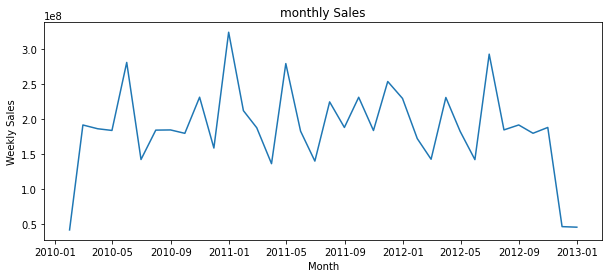

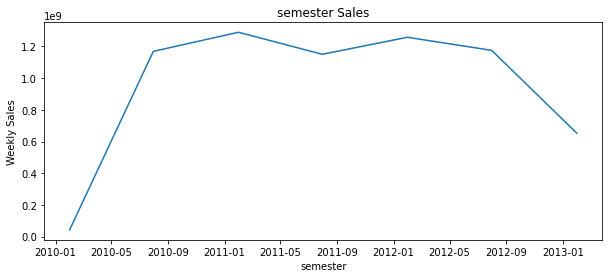

In [212]:
#Monthly sales 
monthly_sales = Walmart_sales_df.groupby(pd.Grouper(key='Date', freq='1M')).sum() 
monthly_sales = monthly_sales.reset_index()

plt.subplots(figsize=(10,4)) 
plt.plot(monthly_sales['Date'],monthly_sales['Weekly_Sales'])
plt.title('monthly Sales')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')

#semester sales 
semester_sales = Walmart_sales_df.groupby(pd.Grouper(key='Date', freq='6M')).sum() 
semester_sales = semester_sales.reset_index()

plt.subplots(figsize=(10,4))  
plt.plot(semester_sales['Date'],semester_sales['Weekly_Sales'])
plt.title('semester Sales')
plt.xlabel('semester')
plt.ylabel('Weekly Sales')

- As we can see from the monthly sales graph, the sales during 2011-1 are the highest.
- As we can see from the semester sales graph, the sales from 1st semester of 2010 and 1st semester of 2013 semester are the lowest.

## Statistical Model 
Build prediction models to forecast demand for store 1

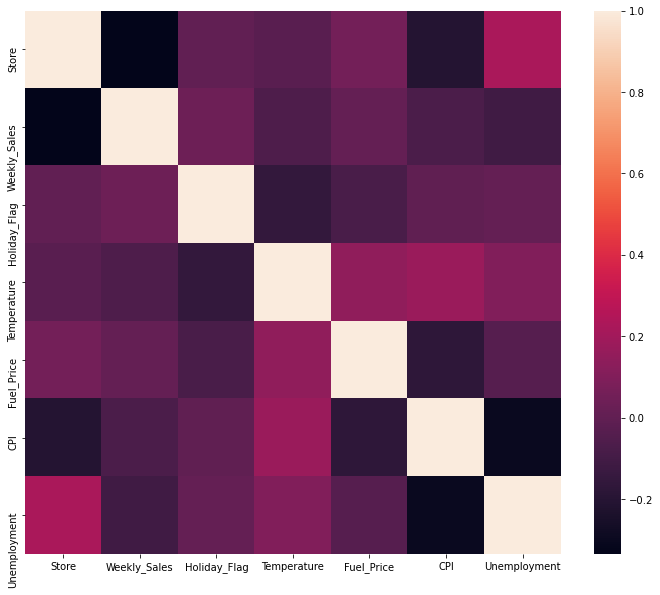

In [213]:
corr = Walmart_sales_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr) 
plt.show()

- The heatmap shows that there is very small impact of CPI, unemployment, and fuel price on sales.

In [214]:
Store1_sales_df = Walmart_sales_df.loc[Walmart_sales_df['Store'] == 1]

In [215]:
Store1_sales_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908
139,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573
140,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573


In [216]:
# Change dates into days by creating new variable.
Store1_sales_df['day'] = Store1_sales_df["Date"].apply(lambda x: x.day)
Store1_sales_df['month'] = Store1_sales_df["Date"].apply(lambda x: x.month)
Store1_sales_df['year'] = Store1_sales_df["Date"].apply(lambda x: x.year)

In [217]:
Store1_sales_df.drop('Date', axis=1, inplace=True)
Store1_sales_df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


In [218]:
scaler = StandardScaler()
Store1_sales_df['Temperature']  = scaler.fit_transform(Store1_sales_df[['Temperature']])  
Store1_sales_df['Fuel_Price']  = scaler.fit_transform(Store1_sales_df[['Fuel_Price']]) 
Store1_sales_df['Unemployment']  = scaler.fit_transform(Store1_sales_df[['Unemployment']])  
Store1_sales_df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,1643690.90,0,-1.830686,-1.521079,211.096358,1.295958,2,5,2010
1,1,1641957.44,1,-2.098280,-1.577441,211.242170,1.295958,2,12,2010
2,1,1611968.17,0,-1.998285,-1.657288,211.289143,1.295958,19,2,2010
3,1,1409727.59,0,-1.526473,-1.546911,211.319643,1.295958,26,2,2010
4,1,1554806.68,0,-1.535627,-1.396612,211.350143,1.295958,3,5,2010


In [219]:
X = Store1_sales_df.drop(columns=['Weekly_Sales'],axis=1).values
y = Store1_sales_df['Weekly_Sales'].values

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
linearRegression_model = LinearRegression()
linearRegression_model.fit(X_train,y_train)

LinearRegression()

In [221]:
yPred = linearRegression_model.predict(X_test) 
print("r2 score is: ",r2_score(y_test,yPred)) 
print("mean sqrd error is: ",mean_squared_error(y_test,yPred)) 

r2 score is  0.18542591472021686
mean_sqrd_error is== 27919980413.739273
